In [1]:
!pip install pandas-profiling==2.7.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tc=pd.read_csv("time_category.csv",index_col=0)                                                        #시간대별 어떤 카테고리가 구매되었는지 파악
tc=tc[['order_id','customer_id','order_status','order_timerange','order_day','product_category_name']]
tc=tc.dropna(axis=0)
translation=pd.read_csv("product_category_name_translation.csv")                                       #포르투갈어로 된 카테고리명을 영어로 표기
tc.insert(6,'product_category_name_english',tc['product_category_name'].map(translation.set_index('product_category_name')['product_category_name_english']))

In [4]:
items=pd.read_csv("olist_order_items_dataset.csv")
timeslot_category = pd.merge(tc, items, on="order_id", how="left")
data=timeslot_category[['order_id','order_status','order_timerange','order_day','product_category_name_english','order_item_id']]

In [5]:
del tc
del items

In [6]:
data0=data[data['order_timerange']==0]
data1=data[data['order_timerange']==1]
data2=data[data['order_timerange']==2]
data3=data[data['order_timerange']==3]     #time_range별로 데이터 분류

In [7]:
data00 = pd.pivot_table(data0, 
               index='product_category_name_english', 
               values='order_status', 
               aggfunc='count')            #00:00 ~ 06:00 시에 구매한 카테고리별 구매주문 횟수
data000=data00.sort_values(by='order_status',ascending=False).head(20) #00:00 ~ 06:00 시에 구매한 카테고리 중 구매주문 횟수가 가장 많은 top20 뽑기

In [8]:
data11 = pd.pivot_table(data1, 
               index='product_category_name_english', 
               values='order_status', 
               aggfunc='count')            #06:00 ~ 12:00 시에 구매한 카테고리별 구매주문 횟수
data111=data11.sort_values(by='order_status',ascending=False).head(20) #06:00 ~ 12:00 시에 구매한 카테고리 중 구매주문 횟수가 가장 많은 top20 뽑기

In [9]:
data22 = pd.pivot_table(data2, 
               index='product_category_name_english', 
               values='order_status', 
               aggfunc='count')            #12:00 ~ 18:00 시에 구매한 카테고리별 구매주문 횟수
data222=data22.sort_values(by='order_status',ascending=False).head(20) #12:00 ~ 18:00 시에 구매한 카테고리 중 구매주문 횟수가 가장 많은 top20 뽑기

In [10]:
data33 = pd.pivot_table(data3, 
               index='product_category_name_english', 
               values='order_status', 
               aggfunc='count')            #18:00 ~ 24:00 시에 구매한 카테고리별 구매주문 횟수
data333=data33.sort_values(by='order_status',ascending=False).head(20) #18:00 ~ 24:00 시에 구매한 카테고리 중 구매주문 횟수가 가장 많은 top20 뽑기

In [11]:
data_weekday=data[data['order_day']==0]
data_weekend=data[data['order_day']==1]     #주중,주말별로 데이터 분류

In [12]:
dataweekdd = pd.pivot_table(data_weekday, 
               index='product_category_name_english', 
               values='order_status', 
               aggfunc='count')            #주중 카테고리별 구매주문 횟수
dataweekddd = dataweekdd.sort_values(by='order_status',ascending=False).head(20) # 주중 구매한 카테고리 중 구매주문 횟수가 가장 많은 top20 뽑기
dataweekddd.loc[['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']]

,order_status
product_category_name_english,
furniture_decor,11197
bed_bath_table,12069
sports_leisure,8636
health_beauty,9113
housewares,8583
watches_gifts,5506
computers_accessories,9811
garden_tools,5735
vehicle_related_product,4285


In [13]:
dataweekendd = pd.pivot_table(data_weekend, 
               index='product_category_name_english', 
               values='order_status', 
               aggfunc='count')            #주말 카테고리별 구매주문 횟수
dataweekenddd = dataweekendd.sort_values(by='order_status',ascending=False).head(20) # 주말 구매한 카테고리 중 구매주문 횟수가 가장 많은 top20 뽑기
dataweekenddd.loc[['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']]

,order_status
product_category_name_english,
furniture_decor,3278
bed_bath_table,3931
sports_leisure,2322
health_beauty,3108
housewares,2288
watches_gifts,1551
computers_accessories,1833
garden_tools,1543
vehicle_related_product,1128


In [14]:
import seaborn as sns

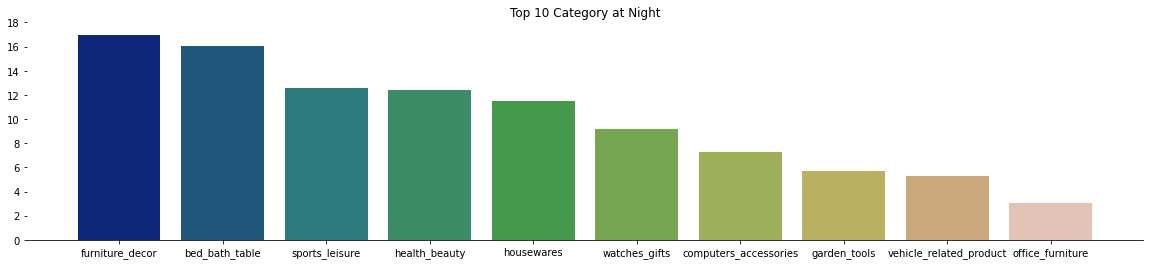

In [15]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[17,16.09,12.56,12.44,11.51,9.18,7.27,5.67,5.27,3.02]
plt.figure(figsize=(20,4))
plt.title("Top 10 Category at Night")
plt.ylim(0,18)
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #00:00 ~ 06:00 주문 top 10 카테고리
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

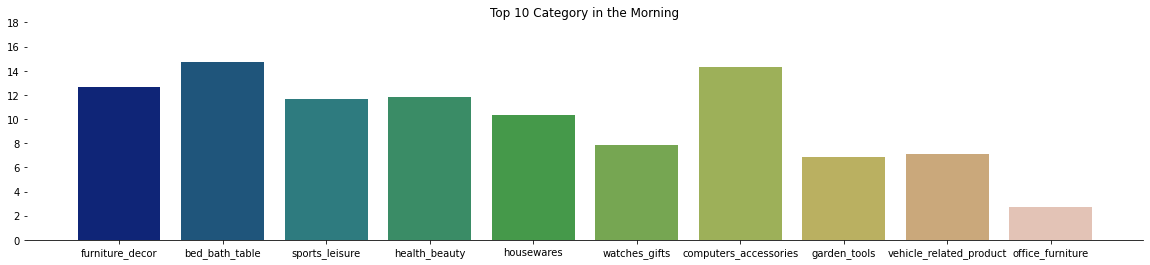

In [16]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[12.64,14.76,11.65,11.8,10.3,7.84,14.34,6.87,7.09,2.72]
plt.figure(figsize=(20,4))
plt.title("Top 10 Category in the Morning")
plt.ylim(0,18)
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #06:00 ~ 12:00 주문 top 10 카테고리
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

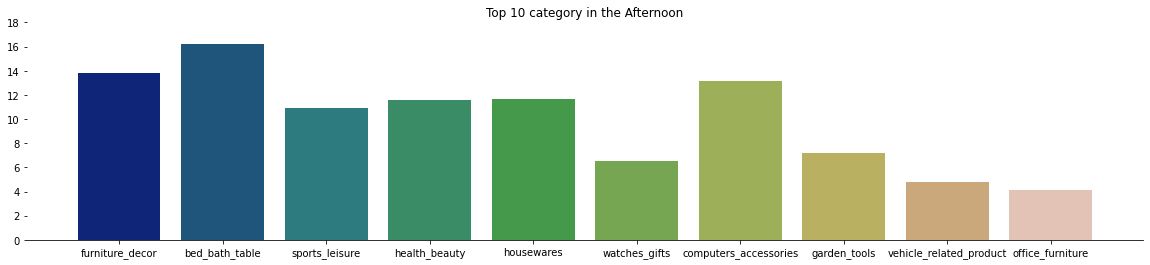

In [17]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[13.84,16.18,10.94,11.6,11.63,6.52,13.18,7.17,4.82,4.12]
plt.figure(figsize=(20,4))
plt.title("Top 10 category in the Afternoon")
plt.ylim(0,18)
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #12:00 ~ 18:00 주문 top 10 카테고리
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

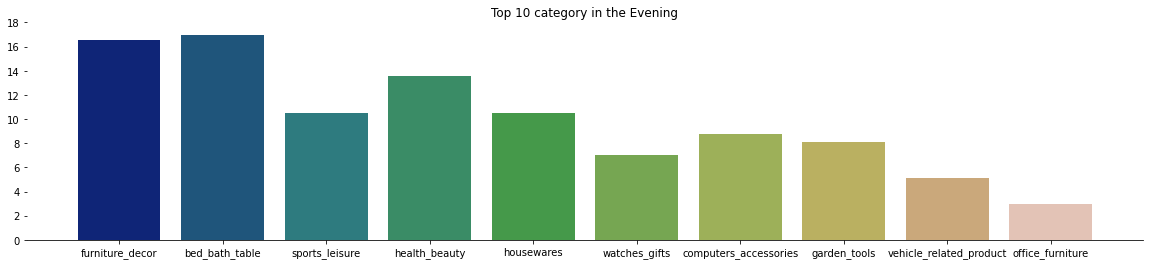

In [18]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[16.52,16.99,10.53,13.54,10.49,7.04,8.74,8.09,5.14,2.93]
plt.figure(figsize=(20,4))
plt.title("Top 10 category in the Evening")
plt.ylim(0,18)
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #18:00 ~ 24:00 주문 top 10 카테고리
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

In [19]:
# 카테고리 리서치 결과
# furniture_decor: 가구(소파 등등)
# bed_bath_table: 침구류, 테이블, 디퓨저, 시트
# housewares: 가정용품, 후라이팬
# computers_accessories: 프린터기, 랩탑, sim카드, 어댑터 등
# garden tools: 캐노피, 실외기 보호 장비, 인조 잔디, 식물, garden umbrella
# vehicle_related_prdocut: 자동차 부품
# office_furniture: 사무용품

In [20]:
price=pd.read_csv("time_payment_type.csv")

In [21]:
revenue = pd.merge(data, price, on="order_id", how="left")   # order 별 가격 데이터 merge

In [22]:
revenue=revenue[['order_id','order_status_x','order_timerange_x','order_day_x','product_category_name_english','order_item_id','customer_id','payment_value']]

In [23]:
revenue_median=pd.pivot_table(revenue, 
               index='product_category_name_english', 
               values='payment_value', 
               aggfunc='median')                                                         #주문 금액 outlier 영향 제거를 위해 중앙값 활용
revenue_median['exchangerate']=revenue_median['payment_value']*330                       #16~18년도 환율을 반영하였을 때 주문 금액 분포 확인
revenue_median.sort_values(by='exchangerate',ascending=False)
revenue_median['rank']=revenue_median['exchangerate'].rank(method='min',ascending=False) #주문 금액 랭크 설정
revenue_median

,payment_value,exchangerate,rank
product_category_name_english,,,
agriculture_products,224.600,74118.00,11.0
air_conditioning,224.885,74212.05,10.0
alcohol_drinks,122.360,40378.80,41.0
art,112.020,36966.60,45.0
arts_and_craftmanship,75.285,24844.05,64.0
...,...,...,...
telephone,56.810,18747.30,68.0
telephone_cable,289.680,95594.40,5.0
toys,113.440,37435.20,43.0


In [24]:
revenue_median1=revenue_median.loc[['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']]
revenue_median1=revenue_median1.sort_values(by='exchangerate',ascending=False)
revenue_median1

,payment_value,exchangerate,rank
product_category_name_english,,,
office_furniture,425.455,140400.15,3.0
computers_accessories,170.360,56218.80,15.0
watches_gifts,165.890,54743.70,18.0
garden_tools,162.570,53648.10,20.0
furniture_decor,153.960,50806.80,25.0
vehicle_related_product,138.170,45596.10,30.0
housewares,134.855,44502.15,31.0
bed_bath_table,134.450,44368.50,32.0
sports_leisure,126.415,41716.95,38.0


In [25]:
#지역별 카테고리 주문 추이 분포 분석
customer=pd.read_csv("olist_customers_dataset.csv",encoding='cp949')
geo=pd.read_csv("olist_geolocation_dataset.csv",encoding='cp949')
geo=geo.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'})
customer_geo = pd.merge(customer, geo, on="customer_zip_code_prefix", how="left")
customer_geo = customer_geo[['customer_id','customer_zip_code_prefix','customer_city','customer_state','geolocation_lat','geolocation_lng']]

In [26]:
customer_geo

,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.509898,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.515413,-47.398194
...,...,...,...,...,...,...
15083728,274fa6071e5e17fe303b9748641082c8,6703,cotia,SP,-23.599369,-46.905603
15083729,274fa6071e5e17fe303b9748641082c8,6703,cotia,SP,-23.593577,-46.910112
15083730,274fa6071e5e17fe303b9748641082c8,6703,cotia,SP,-23.584425,-46.892014
15083731,274fa6071e5e17fe303b9748641082c8,6703,cotia,SP,-23.595022,-46.918546


In [27]:
del customer
del geo

In [28]:
customer_geo1=pd.merge(customer_geo,timeslot_category,on='customer_id',how="left")
customer_geo1=customer_geo1[['order_id','customer_id','order_status','product_category_name_english','customer_city','customer_state','geolocation_lat','geolocation_lng']]

In [29]:
customer_geo11 = customer_geo1[(customer_geo1['product_category_name_english'] == 'computers_accessories') | 
                              (customer_geo1['product_category_name_english'] == 'watches_gifts') | 
                              (customer_geo1['product_category_name_english'] == 'garden_tools') |
                              (customer_geo1['product_category_name_english'] == 'furniture_decor') | 
                              (customer_geo1['product_category_name_english'] == 'vehicle_related_product') | 
                              (customer_geo1['product_category_name_english'] == 'housewares') | 
                              (customer_geo1['product_category_name_english'] == 'bed_bath_table') |
                              (customer_geo1['product_category_name_english'] == 'sports_leisure') | 
                              (customer_geo1['product_category_name_english'] == 'health_beauty') |
                              (customer_geo1['product_category_name_english'] == 'office_furniture')]

In [30]:
customer_geo111=pd.pivot_table(customer_geo11, 
               index=['customer_state','product_category_name_english'], 
               values='order_id', 
               aggfunc='count')

In [31]:
SP = customer_geo111.loc['SP']
RJ = customer_geo111.loc['RJ']
MG = customer_geo111.loc['MG'] 
RS = customer_geo111.loc['RS']
PR = customer_geo111.loc['PR']
SC = customer_geo111.loc['SC']
BA = customer_geo111.loc['BA']
ES = customer_geo111.loc['ES']
#가장 구매 건수가 많았던 8개의 주에서 어떤 카테고리에 대한 수요가 많았는지 분석

In [32]:
SP

,order_id
product_category_name_english,
bed_bath_table,1015484
computers_accessories,612907
furniture_decor,934443
garden_tools,437590
health_beauty,734725
housewares,602485
office_furniture,176663
sports_leisure,642593
vehicle_related_product,267455


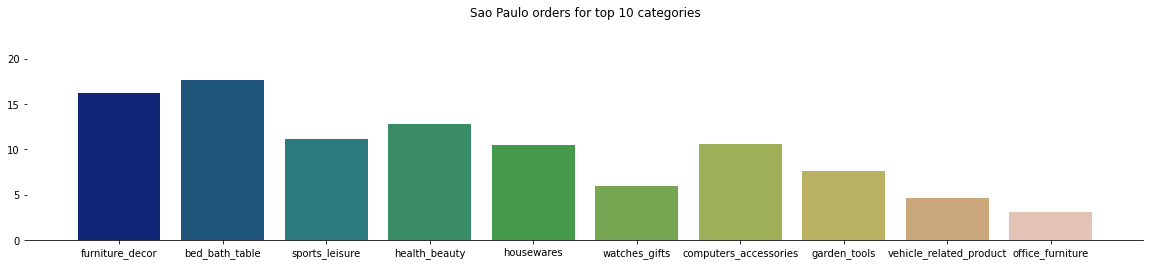

In [33]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[16.21,17.62,11.15,12.75,10.45,5.9,10.63,7.59,4.64,3.06]
plt.figure(figsize=(20,4))
plt.ylim(0,24)
plt.title("Sao Paulo orders for top 10 categories")
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #상파울루 카테고리별 주문 건수
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

In [34]:
RJ

,order_id
product_category_name_english,
bed_bath_table,544923
computers_accessories,336032
furniture_decor,454592
garden_tools,221722
health_beauty,309610
housewares,354720
office_furniture,206794
sports_leisure,324846
vehicle_related_product,108632


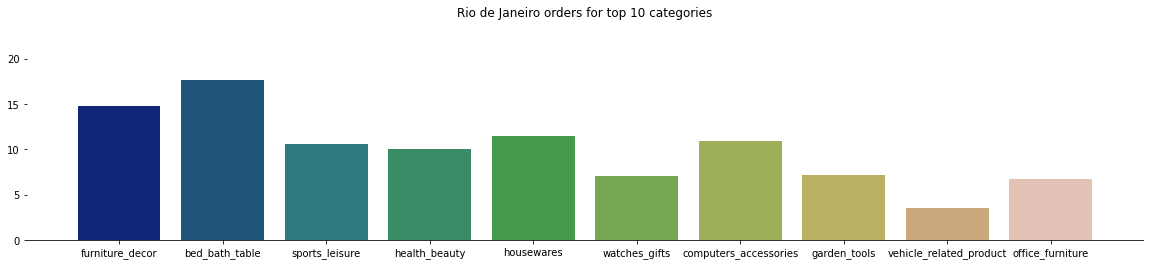

In [35]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[14.76,17.69,10.55,10.05,11.52,7.08,10.91,7.2,3.53,6.71]
plt.figure(figsize=(20,4))
plt.ylim(0,24)
plt.title("Rio de Janeiro orders for top 10 categories")
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #리우데자네이루 카테고리별 주문 건수
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

In [36]:
MG

,order_id
product_category_name_english,
bed_bath_table,479476
computers_accessories,337190
furniture_decor,440003
garden_tools,244911
health_beauty,347072
housewares,421234
office_furniture,52340
sports_leisure,321009
vehicle_related_product,125486


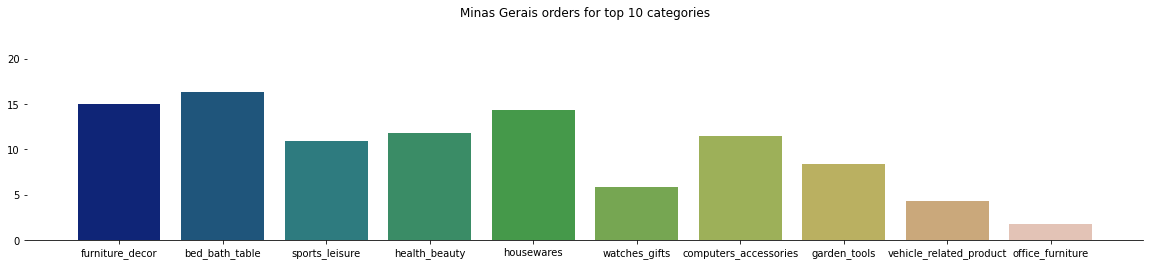

In [37]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[14.97,16.31,10.92,11.8,14.33,5.83,11.47,8.33,4.27,1.78]
plt.figure(figsize=(20,4))
plt.ylim(0,24)
plt.title("Minas Gerais orders for top 10 categories")
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #미나스 헤라이스 카테고리별 주문 건수
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

In [38]:
RS

,order_id
product_category_name_english,
bed_bath_table,147247
computers_accessories,131597
furniture_decor,135416
garden_tools,63815
health_beauty,78040
housewares,105646
office_furniture,13877
sports_leisure,88006
vehicle_related_product,29118


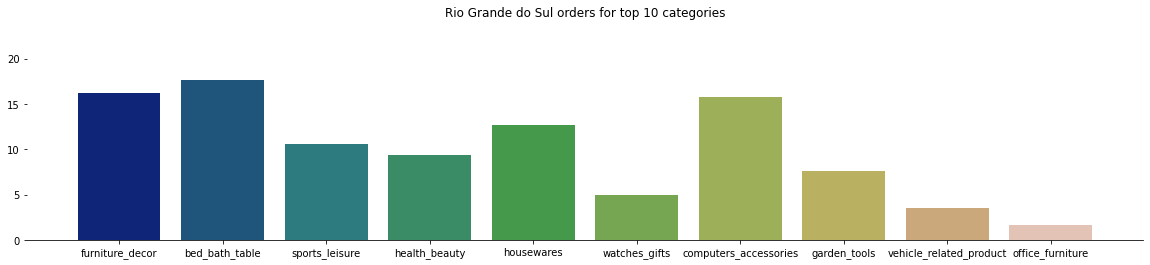

In [39]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[16.23,17.65,10.55,9.36,12.67,4.96,15.78,7.65,3.49,1.66]
plt.figure(figsize=(20,4))
plt.ylim(0,24)
plt.title("Rio Grande do Sul orders for top 10 categories")
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #리오 그란데 데 술 주 카테고리별 주문 건수
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

In [40]:
PR

,order_id
product_category_name_english,
bed_bath_table,84851
computers_accessories,66747
furniture_decor,168832
garden_tools,36870
health_beauty,72617
housewares,70718
office_furniture,26665
sports_leisure,80324
vehicle_related_product,31245


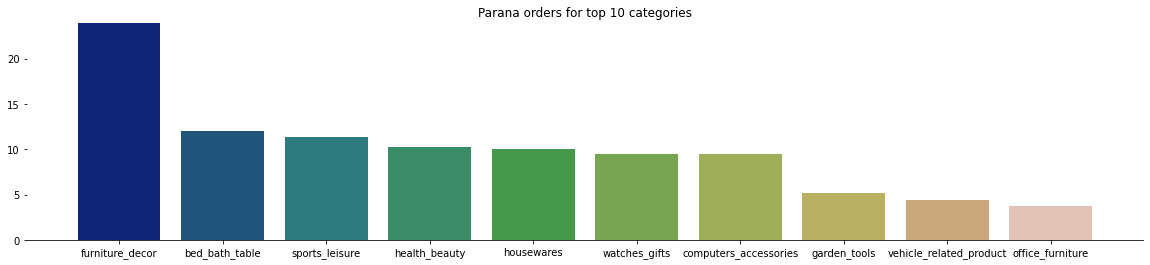

In [41]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[23.93,12.03,11.39,10.29,10.02,9.44,9.46,5.23,4.43,3.78]
plt.figure(figsize=(20,4))
plt.ylim(0,24)
plt.title("Parana orders for top 10 categories")
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #파라냐 주 카테고리별 주문 건수
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

In [42]:
SC

,order_id
product_category_name_english,
bed_bath_table,80810
computers_accessories,67372
furniture_decor,75784
garden_tools,38014
health_beauty,50416
housewares,63849
office_furniture,16321
sports_leisure,81418
vehicle_related_product,36798


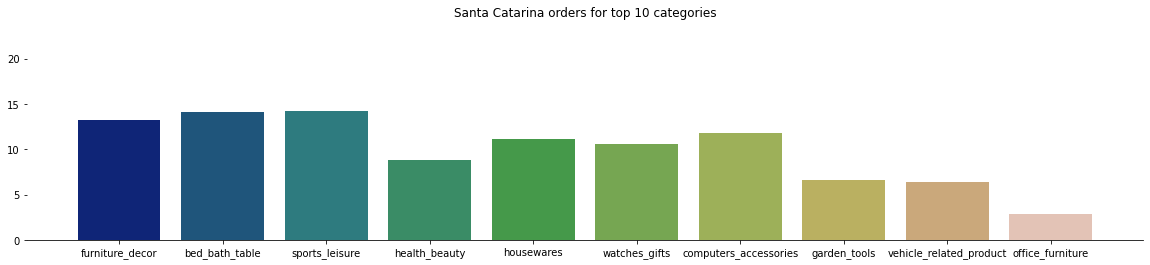

In [43]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[13.27,14.15,14.25,8.83,11.18,10.58,11.79,6.66,6.44,2.86]
plt.figure(figsize=(20,4))
plt.ylim(0,24)
plt.title("Santa Catarina orders for top 10 categories")
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #산타 카타리나 카테고리별 주문 건수
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

In [44]:
BA

,order_id
product_category_name_english,
bed_bath_table,57434
computers_accessories,47843
furniture_decor,48906
garden_tools,23537
health_beauty,44034
housewares,26666
office_furniture,22893
sports_leisure,40431
vehicle_related_product,17626


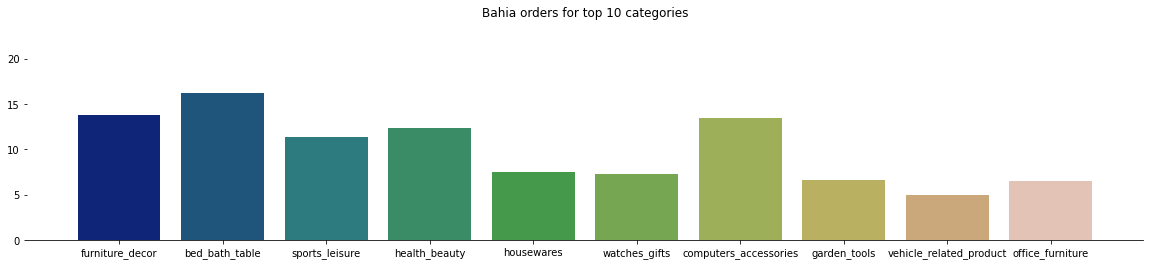

In [45]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[13.78,16.18,11.39,12.4,7.51,7.23,13.48,6.63,4.96,6.45]
plt.figure(figsize=(20,4))
plt.ylim(0,24)
plt.title("Bahia orders for top 10 categories")
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #바이아 주 카테고리별 주문 건수
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

In [46]:
ES

,order_id
product_category_name_english,
bed_bath_table,45327
computers_accessories,31576
furniture_decor,34825
garden_tools,28283
health_beauty,30282
housewares,21729
office_furniture,3875
sports_leisure,35827
vehicle_related_product,12170


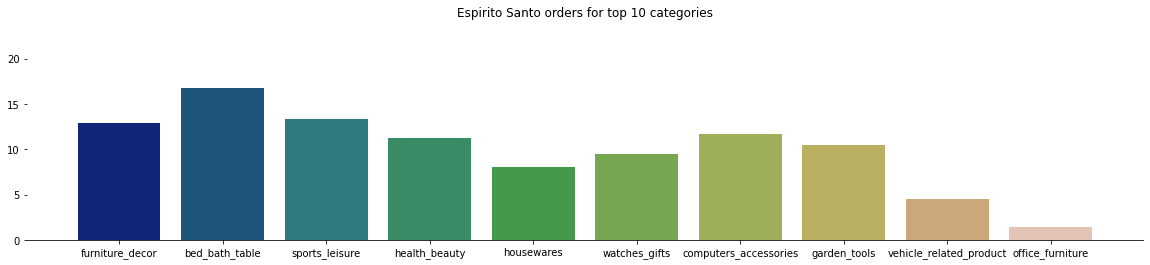

In [47]:
x=['furniture_decor','bed_bath_table','sports_leisure','health_beauty','housewares','watches_gifts','computers_accessories','garden_tools','vehicle_related_product','office_furniture']
values=[12.92,16.82,13.3,11.24,8.06,9.49,11.72,10.5,4.52,1.44]
plt.figure(figsize=(20,4))
plt.ylim(0,24)
plt.title("Espirito Santo orders for top 10 categories")
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         #에스피리토 산토 주 카테고리별 주문 건수
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

In [48]:
# 10개의 상위 카테고리 선정에 대한 데이터 분석
# 카테고리별 주문 건수(양적 지표)와 카테고리별 주문 금액의 중앙값(질적지표)를 모두 반영하였을 때 상위 10개의 카테고리를 선정
datadata = pd.pivot_table(data,index=['product_category_name_english'], 
               values='order_status', 
               aggfunc='count')
qualityquantity = pd.merge(revenue_median, datadata, on="product_category_name_english", how="left")
qualityquantity['importancy']=qualityquantity['payment_value']*qualityquantity['order_status']
qualityquantity=qualityquantity.sort_values(by='importancy',ascending=False).head(10)

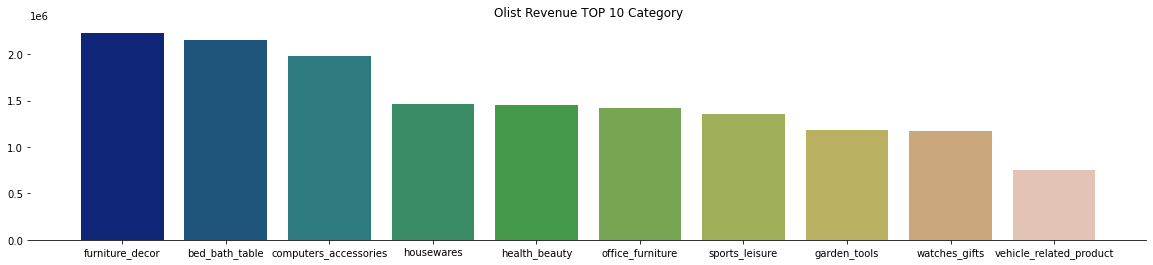

In [49]:
x=['furniture_decor','bed_bath_table','computers_accessories','housewares','health_beauty','office_furniture','sports_leisure','garden_tools','watches_gifts','vehicle_related_product']
values=[2228571,2151200,1983671,1466008,1446355,1423146,1358255,1183184,1170685,747914]
plt.figure(figsize=(20,4))
plt.title("Olist Revenue TOP 10 Category")
colors = sns.color_palette('gist_earth',len(x))
plt.bar(x,values,color=colors)                         
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거